In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.SeqUtils import GC
from Bio.SeqUtils import MeltingTemp as mt

In [2]:
def corrected_tm(seq):
    tm = mt.Tm_NN(seq, Na=390)
    tm_corr = mt.chem_correction(tm, fmd=50)
    return tm_corr

In [3]:
#Read CTRL
colnames = ['Chromosome', 'Start', 'End', 'Name', '20nt hits', 'Align', 'Chromosome targets', 'Sequence', 'Tm']
path = "./CTRL_L_hg38_probes.csv"
df = pd.read_csv(path, names=colnames, sep=';', header=None)

#Read EVI1
colnames = ['Chromosome', 'Start', 'End', 'Name', '20nt hits', 'Align', 'Chromosome targets', 'Sequence', 'Tm']
path = "./EVI1_PR_M_hg38.csv"
df_2 = pd.read_csv(path, names=colnames, sep=';', header=None)

#Read MYC
colnames = ['Chromosome', 'Start', 'End', 'Name', '20nt hits', 'Align', 'Chromosome targets', 'Sequence', 'Tm']
path = "./MYC_SE_R_hg38.csv"
df_3 = pd.read_csv(path, names=colnames, sep=';', header=None)

In [4]:
#Calculate correct TM
df["Corrected Tm"] = df['Sequence'].apply(corrected_tm)

df_2["Corrected Tm"] = df_2['Sequence'].apply(corrected_tm)

df_3["Corrected Tm"] = df_3['Sequence'].apply(corrected_tm)

In [5]:
#Calculate GC
df["GC"] = df['Sequence'].apply(GC)

df_2["GC"] = df_2['Sequence'].apply(GC)

df_3["GC"] = df_3['Sequence'].apply(GC)

In [6]:
df['source']='CTRL_L'
df_2['source']='EVI1_PR_M'
df_3['source']='MYC_SE_R'

df_stack=pd.concat([df, df_2, df_3], axis=0).reset_index()

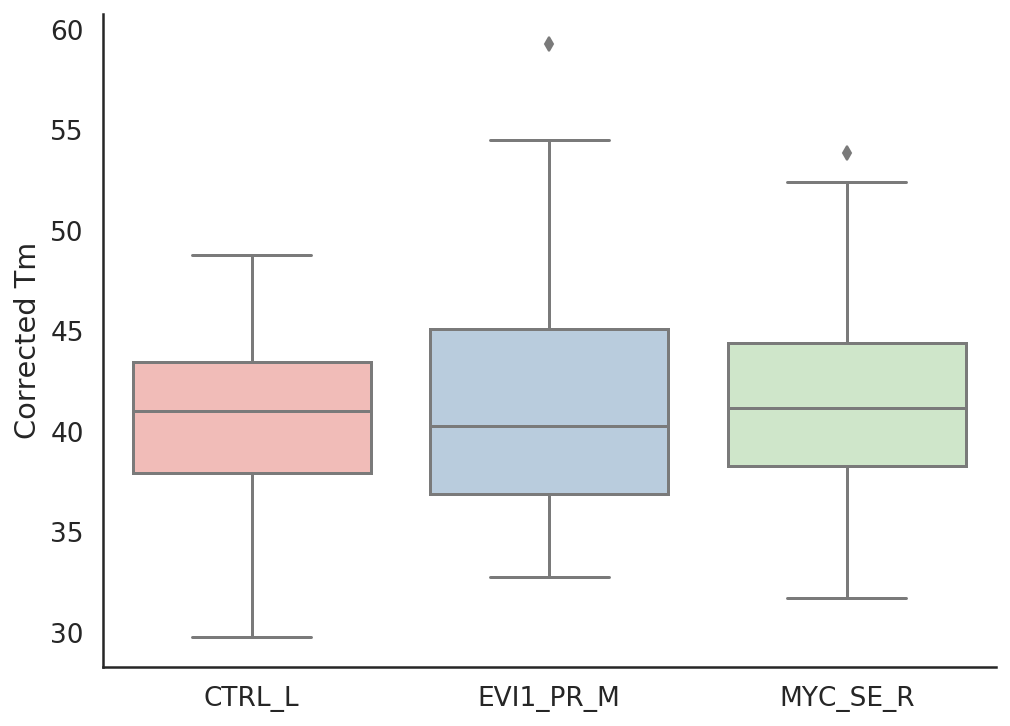

In [7]:
import seaborn as sns
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.set_style('white')
boxplot = sns.boxplot(data=df_stack, y="Corrected Tm", x= "source", palette='Pastel1')
boxplot.set(xlabel=None)
sns.despine()
plt.show()

In [8]:
df_stack

,index,Chromosome,Start,End,Name,20nt hits,Align,Chromosome targets,Sequence,Tm,Corrected Tm,GC,source
0,0,chr3,169000047,169000087,CTRL_L_8,1,40,chr3,CACTCAGTTTGGGATGGGAGTTTAGCTATCTTCTTTCCAG,"69.93169,,",42.177064,45.0,CTRL_L
1,1,chr3,169000299,169000339,CTRL_L_14,1,40,chr3,GTCCTTTCTTTGGTCTTTGCTTTCCACTTTAGCCCTAATG,"69.809028,,",42.028058,42.5,CTRL_L
2,2,chr3,169000341,169000381,CTRL_L_15,1,40,chr3,AACTATTTTCCTCTCTTCCAAAGGCTTTTTCAGTCCTTCT,"68.614881,,",40.904312,37.5,CTRL_L
3,3,chr3,169000383,169000423,CTRL_L_16,1,40,chr3,ATCAGAAGACATTAAAATCCTCCATTGAATCCTCTGACCT,"68.023115,,",40.327513,37.5,CTRL_L
4,4,chr3,169000467,169000507,CTRL_L_18,1,40,chr3,ACAATCACAATAAACTGTTGATTCCAGACCTTTTTCCACA,"68.214893,,",40.458661,35.0,CTRL_L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,64,chr8,129568673,129568713,MYC_SE_R_110,1,40,chr8,AGTATTATTATTTAACATTTTTTAAGCACTTTTGATGGAC,61.637969,33.769141,22.5,MYC_SE_R
221,65,chr8,129568799,129568839,MYC_SE_R_113,1,40,chr8,TAAGCTCTTATCCATTTTTTCAAGGAGCTTCTTCTTCCCC,68.863746,41.130367,40.0,MYC_SE_R
222,66,chr8,129568925,129568965,MYC_SE_R_116,1,40,chr8,TTTATATGTGTTATCCAGTGGTATACTTACCTTCATGTTG,64.698584,36.901364,32.5,MYC_SE_R
223,67,chr8,129568967,129569007,MYC_SE_R_117,2,"40,27","chr8,chrX",CTTTAACATGACTTACTGCAGGCTAGATACTGTGCTAAGT,68.362177,40.565458,40.0,MYC_SE_R


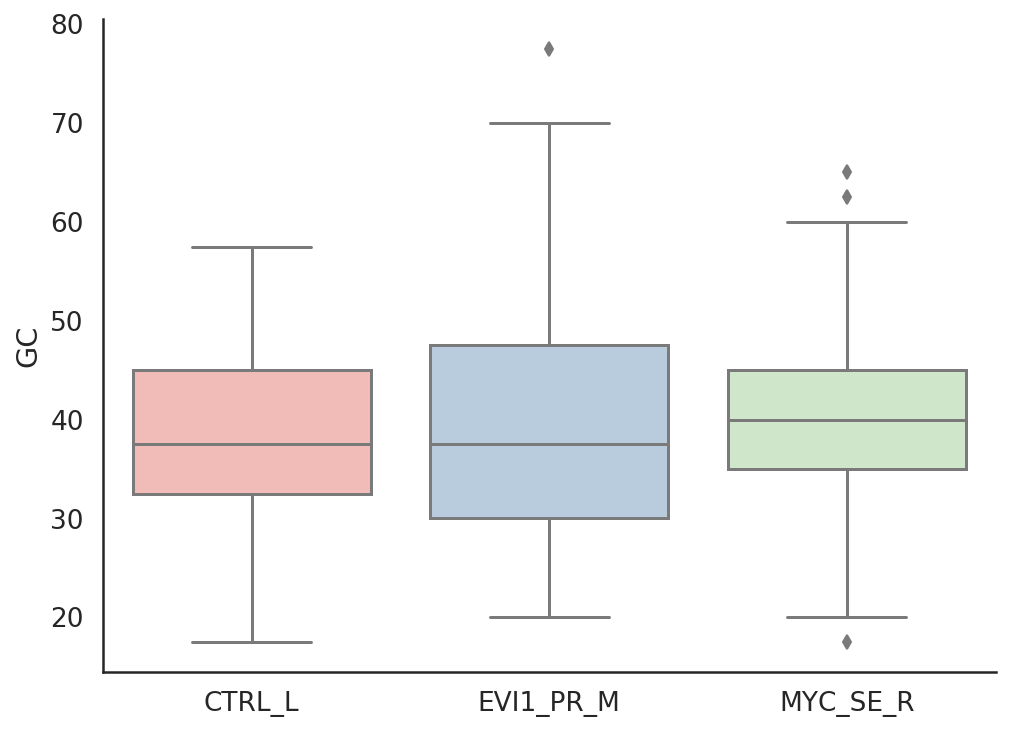

In [9]:
import seaborn as sns
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.set_style('white')
boxplot = sns.boxplot(data=df_stack, y="GC", x= "source", palette='Pastel1')
boxplot.set(xlabel=None)
sns.despine()
plt.show()

In [10]:
#For GC content

from scipy.stats import mannwhitneyu
from statsmodels.stats.multicomp import MultiComparison

# init multi comparison

mc = MultiComparison(df_stack['GC'], df_stack['source'])

# do pairwise tests with MannWhitneyU, Holm correction
res, _, _ = mc.allpairtest(mannwhitneyu, method='holm')

# display results as table
res

group1,group2,stat,pval,pval_corr,reject
CTRL_L,EVI1_PR_M,3126.5,0.7638,0.7638,False
CTRL_L,MYC_SE_R,2390.0,0.2952,0.7596,False
EVI1_PR_M,MYC_SE_R,2428.5,0.2532,0.7596,False


In [11]:
#For Tm 

# init multi comparison
mc = MultiComparison(df_stack['Corrected Tm'], df_stack['source'])

# do pairwise tests with MannWhitneyU, Holm correction
res, _, _ = mc.allpairtest(mannwhitneyu, method='holm')

# display results as table
res

group1,group2,stat,pval,pval_corr,reject
CTRL_L,EVI1_PR_M,3051.0,0.9745,0.9745,False
CTRL_L,MYC_SE_R,2396.0,0.3081,0.9244,False
EVI1_PR_M,MYC_SE_R,2507.0,0.4021,0.9244,False
